In [97]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, BatchNormalization,
                                     Flatten, Dense, Dropout)
import matplotlib.pyplot as plt

In [98]:
with open("data2.json", "r") as fp:
  data = json.load(fp)

X = np.array(data["mfcc"])
y = np.array(data["labels"])

In [99]:
X.shape

(160, 259, 13)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [101]:
X_train.shape

(128, 259, 13)

In [102]:
# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [103]:
X_train.shape

(128, 259, 13, 1)

In [104]:
X_test.shape

(32, 259, 13, 1)

In [105]:
model = Sequential([
  Conv2D(32, (3, 3), activation='relu',
         input_shape=(X_train.shape[1], X_train.shape[2], 1)),
  MaxPooling2D((3, 3), strides=(2, 2), padding='same'),
  BatchNormalization(),
  
  Conv2D(32, (3, 3), activation='relu'),
  MaxPooling2D((3, 3), strides=(2, 2), padding='same'),
  BatchNormalization(),
  
  Conv2D(32, (2, 2), activation='relu'),
  MaxPooling2D((2, 2), strides=(2, 2), padding='same'),
  BatchNormalization(),
  
  # flatten output
  Flatten(),
  Dense(64, activation='relu'),
  Dropout(0.3),
  
  # output
  Dense(3, activation='softmax')
])

In [106]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              # loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 257, 11, 32)       320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 129, 6, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_15 (Ba  (None, 129, 6, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_16 (Conv2D)          (None, 127, 4, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 64, 2, 32)         0         
 ng2D)                                                           
                                                      

In [107]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32, epochs=50)

Epoch 1/50
4/4 [==============================] - 1s 54ms/step - loss: 2.0686 - accuracy: 0.2891 - val_loss: 5.9627 - val_accuracy: 0.4688
Epoch 2/50
4/4 [==============================] - 0s 26ms/step - loss: 1.8813 - accuracy: 0.3594 - val_loss: 4.8901 - val_accuracy: 0.4688
Epoch 3/50
4/4 [==============================] - 0s 27ms/step - loss: 1.5131 - accuracy: 0.4297 - val_loss: 4.2856 - val_accuracy: 0.4688
Epoch 4/50
4/4 [==============================] - 0s 26ms/step - loss: 1.4004 - accuracy: 0.4453 - val_loss: 3.8104 - val_accuracy: 0.4688
Epoch 5/50
4/4 [==============================] - 0s 26ms/step - loss: 1.2966 - accuracy: 0.5156 - val_loss: 3.4894 - val_accuracy: 0.4688
Epoch 6/50
4/4 [==============================] - 0s 25ms/step - loss: 1.0151 - accuracy: 0.5938 - val_loss: 3.2525 - val_accuracy: 0.4688
Epoch 7/50
4/4 [==============================] - 0s 25ms/step - loss: 0.9633 - accuracy: 0.5938 - val_loss: 3.0189 - val_accuracy: 0.4688
Epoch 8/50
4/4 [===========

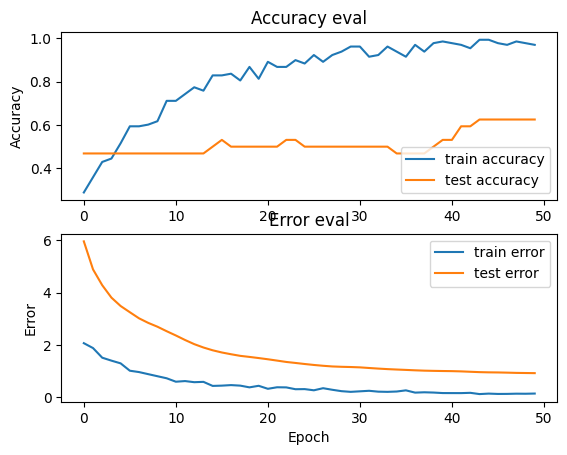

In [108]:
fig, axs = plt.subplots(2)

# create accuracy sublpot
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")

# create error sublpot
axs[1].plot(history.history["loss"], label="train error")
axs[1].plot(history.history["val_loss"], label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")

plt.show()

In [109]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
f'Loss: {loss}, Accuracy: {accuracy}'

1/1 - 0s - loss: 0.9225 - accuracy: 0.6250 - 20ms/epoch - 20ms/step


'Loss: 0.9224556088447571, Accuracy: 0.625'

In [112]:
# Prediction
X_to_predict = X_test[1]
y_to_predict = y_test[1]

# add 1 dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model.predict(X_to_predict)

predicted_index = np.argmax(prediction, axis=1)

print(f"Target: {y_to_predict}, Predicted label: {predicted_index}")

1/1 [==============================] - 0s 15ms/step
Target: 1, Predicted label: [1]
